#### Artificial Neural Networks

Suppose that we have the following dataset:

(-1.6930476519295277,
 2.689683884193551,
 -1.121533145757048,
 1.6446470913859756)

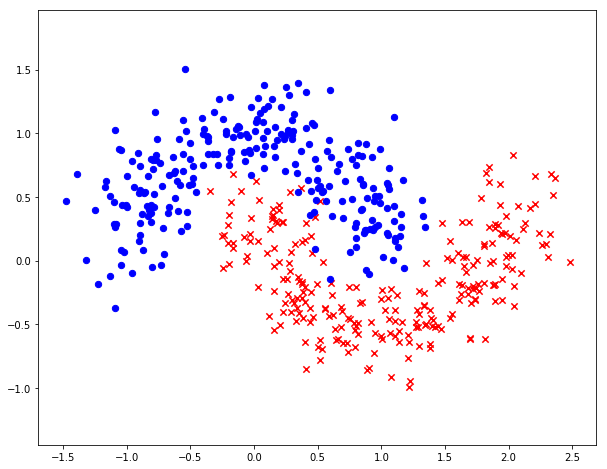

In [1]:
%matplotlib widget
%matplotlib inline
import numpy as np
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

X, y = make_moons(500, noise=0.2, random_state=42)
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=40, marker='x',c='red')
plt.scatter(X[:,0][y==0], X[:,1][y==0], s=40, marker='o',c='blue')
plt.axis('equal')

Here, $X=\{x^{(1)},x^{(2)}, \dots,x^{(m)}  \}$ and $x^{(i)} \in \mathbb{R}$ where each sample has two features. Each sample is labeled into two categories with labels $y^{(i)} \in \{0,1\}$. The ANN that we will use here is a simple 3 layer network, with 3 neurons in the input layer, 2 neurons in the hidden layer, and 1 neuron in the output layer. Suppose that we use the mean square error (MSE), as the loss function to optimize the network. Recall that the MSE is

$$ \mathcal{L}(\hat{y},y)=\frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$

a) For this ANN, suppose that the activation function used is a tanh activation function. What is the gradient descent update for the output layer, layer 3, that is:

$$\frac{\partial\mathcal{L}}{\partial \mathbf{W}^{[\ell]}} = \text{?}$$

where $\ell = 3$.

#### Answer

Since $\hat{y}^{(i)} = a^{[3](i)}$, replace $\hat{y}^{(i)}$ in the loss equation.

$$ \mathcal{L}(\hat{y},y)=\frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{m} \sum_{i=1}{m}(a^{[3](i)} - y^{(i)})^2$$

To find the gradient descent update, we find the gradient of $\mathcal{L}$ w.r.t. $\mathbf{W}$. This can be calculated using the chain rule.

$$ \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}} = \frac{\partial \mathcal{L}}{\partial a^{[3]}}\frac{\partial a^{[3]}}{\partial z^{[3]}}\frac{\partial z^{[3]}}{\partial \mathbf{W}^{[3]}} $$

Let's find the three partial gradients one by one.

$$\frac{\partial \mathcal{L}}{\partial a^{[3]}} = \frac{2}{m} \sum_{i=0}^{m}(a^{[3](i)} - y^{(i)}) $$

$$ \frac{\partial a^{[3]}}{\partial z^{[3]}} = 1 - \tanh^2(z^{[3]}) $$

$$ \frac{\partial z^{[3]}}{\partial \mathbf{W}^{[3]}} = {a^{[2]}}^T $$

Plug these partial gradients into the original equation:

$$ \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}} = \frac{2}{m} \sum_{i=0}^{m}(a^{[3](i)} - y^{(i)}) \big(1 - \tanh^2(z^{[3]})\big) {a^{[2]}}^T $$

b) Suppose now that we use the rectified linear unit, or ReLU as the activation function.

$$ReLU: f(x) = \begin{cases} 
      x & x\gt 0 \\
      0 & otherwise 
   \end{cases}
$$

Find the gradient descent update for $\ell = 3$.

#### Answer

Since we're only changing the activation function, only the part related to it will change.

$$ \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[3]}} = \begin{cases}
    \frac{2}{m} \sum_{i=0}^{m}(a^{[3](i)} - y^{(i)}) {a^{[2]}}^T & x\gt 0 \\
    0 & otherwise
    \end{cases}
$$

#### Building a Simple Network of One Hidden Layer and Three Neurons

In [55]:
# training set size
num_examples = len(X)
y = y.reshape(y.shape[0], 1)
# input layer dimensionality
nn_input_dim = 2
# output layer dimensionality
nn_output_dim = 1

# gradient descent parameters
# learning rate for gradient descent
alpha = 0.01
# regularization strength
reg_lambda = 0.01


#  function to plot a decision boundary.

def plot_decision_boundary(pred_func):
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.coolwarm)

#  function to evaluate the total loss on the dataset
def calculate_loss(model):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    # calculate our predictions using forward prop
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = 1 / (1 + np.exp(-z2))
    #exp_scores = np.exp(z2)
    #probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # calculate the loss
    #print(a2)
    correct_logprobs = -(y * np.log(a2) + (1-y)*np.log(1-a2))
    #corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))

    return 1./num_examples * data_loss



# function to predict an output (0 or 1)
def predict(model, x):
    # get model parameters
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    # calculate the outputs
    
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    #print(z2.shape)
    # sigmoid
    a2 = 1 / (1 + np.exp(-z2))
    #exp_scores = np.exp(z2)
    #probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    #result = 1 if a2 > 0.5 else 0
    result = np.round(a2)
    # find the index with the largest value
    #return np.argmax(probs, axis=1)
    return result

# function that builds and trains the model
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    w1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    w2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # we'll store the model params in this dictionary
    model = {}
    
    # gradient descent. For each batch...
    for i in range(0, num_passes):

        # forward propagation
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        a2 = 1 / (1 + np.exp(-z2))
        #exp_scores = np.exp(z2)
        #probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # back propagation
        delta3 = a2 - y
        #delta3[range(num_examples)] -= y
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1, 2))
        dw1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # regularization terms (b1 and b2 don't have regularization terms)
        dw2 += reg_lambda * w2
        dw1 += reg_lambda * w1

        # gradient descent parameter update
        w1 += -alpha * dw1
        b1 += -alpha * db1
        w2 += -alpha * dw2
        b2 += -alpha * db2
        
        # Assign new parameters to the model
        model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        
        # print the loss every so often
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

def accuracy(model, X, y):
    y_pred = predict(model, X)
    correct_preds = len(X) - np.sum(abs(y_pred - y))
    return correct_preds * 100 / len(X)

In [56]:
# Build a model with a 4-dimensional hidden layer
model = build_model(3, print_loss=True)

Loss after iteration 0: 0.439032
Loss after iteration 1000: 0.053985
Loss after iteration 2000: 0.052039
Loss after iteration 3000: 0.054693
Loss after iteration 4000: 0.052602
Loss after iteration 5000: 0.054198
Loss after iteration 6000: 0.051853
Loss after iteration 7000: 0.053268
Loss after iteration 8000: 0.051802
Loss after iteration 9000: 0.052761
Loss after iteration 10000: 0.052031
Loss after iteration 11000: 0.053720
Loss after iteration 12000: 0.052055
Loss after iteration 13000: 0.052892
Loss after iteration 14000: 0.051865
Loss after iteration 15000: 0.052487
Loss after iteration 16000: 0.051813
Loss after iteration 17000: 0.053587
Loss after iteration 18000: 0.051867
Loss after iteration 19000: 0.053115


(173950, 1)


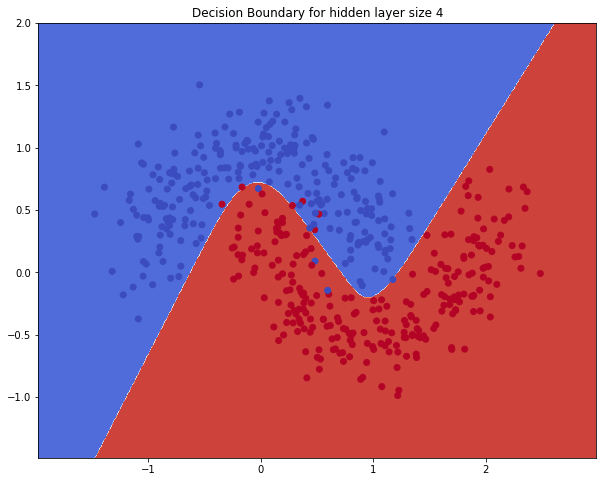

In [49]:
# show the decision boundary
plt.title("Decision Boundary for hidden layer size 4")
plot_decision_boundary(lambda x: predict(model, x))

In [58]:
print('Accuracy: ' + str(accuracy(model, X, y)) + '%')

Accuracy: 98.2%


#### Problem 3. **[10 points]** Convolutional Neural Networks

a) Modify the code from example set 5 to create a convolutional neural network to classify the notMNIST dataset. You can download the dataset [here](https://www.kaggle.com/lubaroli/notmnist). Please be sure to include some type of validation/testing as part of your solution, i.e. train/test split or cross-validation.